In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

using StaticArrays, DifferentialEquations, DynamicalSystems
sE, sI, rE, rI, Y  = -50..50, -50..50,  -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y
using CairoMakie, LinearAlgebra

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function get_valus_vectors(fp)
    Jfp = rate_jac(fp, p, 0.0)
    Jfp_value_vectors = eigen(Jfp)
    Jfp_value = Jfp_value_vectors.values
    Jfp_vectors = Jfp_value_vectors.vectors
    return Jfp_value, Jfp_vectors
end

get_valus_vectors (generic function with 1 method)

In [ ]:
time = 500.0; tt = 0.0; tstep = 0.001; tspan = (0.0, time)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [122]:
τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;
τrE = 2.0; kE = 5.0; IE = 1.8982; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;
τY = 0.01;  βY = 0.01;
ythr = 0.5; sEthr = 0.5; kY = 0.01
γY = 5.0;

In [123]:
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.1592694277409673, 0.5692558879909888, 0.00024313311264429925, 0.07608583399156753, 1.5975600196964002e-19]

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set);

In [124]:
fp, ei, _ = fixedpoints(ds, box, rate_jac);

In [125]:
fp

5-dimensional StateSpaceSet{Float64} with 3 points
 0.649123  0.872545  0.123147  0.757662  0.0001
 0.925332  0.899957  0.89893   0.999516  0.0001
 0.647482  0.871759  0.12217   0.752252  0.0001

In [126]:
ei

3-element Vector{Vector{ComplexF64}}:
 [-100.00000000022793 + 0.0im, -1.757087495685636 + 0.0im, -0.8070425207928034 + 0.0im, -0.002391091417530809 + 0.0im, 0.3862241927569151 + 0.0im]
 [-100.0 + 0.0im, -3.8625686796542418 + 0.0im, -0.8995330831642201 + 0.0im, -0.43190502119944973 + 0.0im, -0.16687191616981517 + 0.0im]
 [-100.0000000002677 + 0.0im, -1.7528984516995896 + 0.0im, -0.8052372840667084 + 0.0im, 0.0024204046814201383 + 0.0im, 0.38350629757139865 + 0.0im]

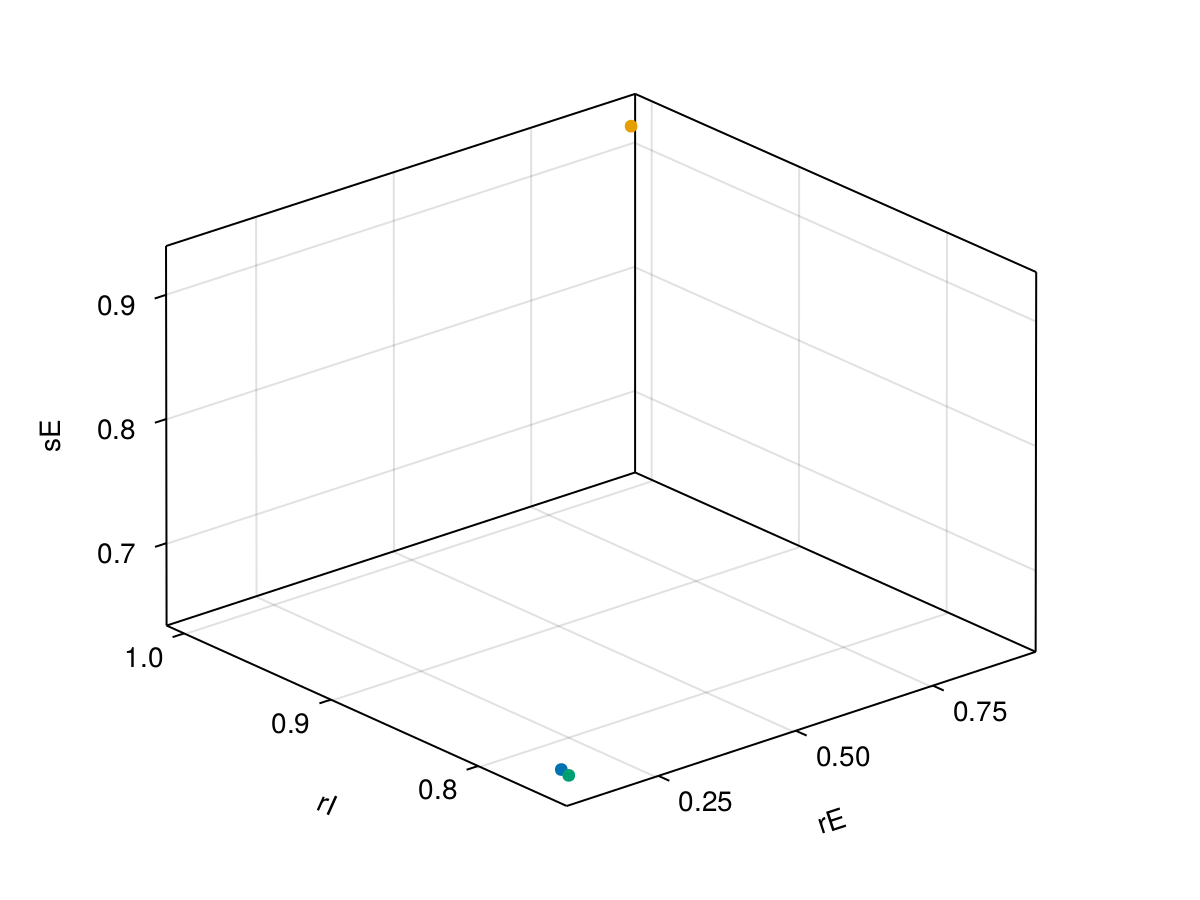

CairoMakie.Screen{IMAGE}


In [127]:
indexx = 3; indexy = 4; indexz = 1
f = Figure()
ax = Axis3(f[1, 1], xlabel = "rE", ylabel = "rI", zlabel = "sE")
for index in range(1, length(fp))
    scatter!(ax, fp[index][indexx], fp[index][indexy], fp[index][indexz])
end
display(f)

In [25]:
ei

1-element Vector{Vector{ComplexF64}}:
 [-100.00000378321478 + 0.0im, -1.3275158099101252 + 0.0im, -0.6378382198411605 + 0.0im, 0.24184769059363204 - 0.31040909035281344im, 0.24184769059363204 + 0.31040909035281344im]

In [9]:
#traj, trange = trajectory(ds, 10000)

In [10]:
#=f = Figure()
ax = Axis(f[1, 1])
lines!(ax, trange, traj[:, 1])
display(f)=#

In [11]:
#lyapunovspectrum(ds, 2000)